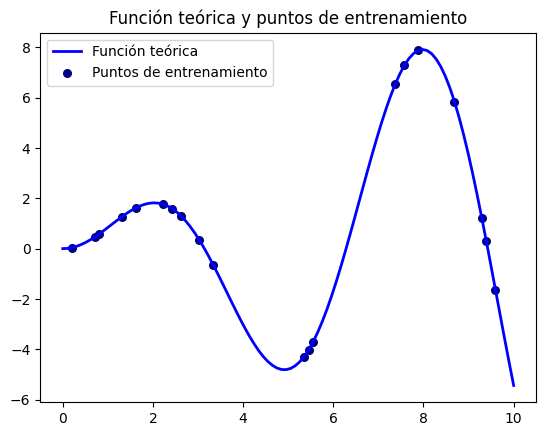


Polinomio de grado 3:
          3          2
-0.05329 x + 0.8502 x - 3.427 x + 3.377
Error cuadrático medio ECM para grado 3: 9.5907

Polinomio de grado 4:
          4        3         2
-0.06679 x + 1.25 x - 7.211 x + 13.38 x - 4.741
Error cuadrático medio ECM para grado 4: 1.5359

Polinomio de grado 5:
           5          4          3          2
-0.009309 x + 0.1626 x - 0.7565 x + 0.1762 x + 3.023 x - 1.207
Error cuadrático medio ECM para grado 5: 0.7573


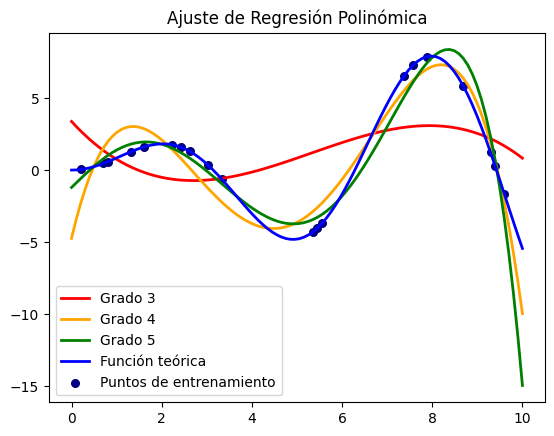


Predicción para X=6 (grado 5): y = -1.8108


In [1]:
# REGRESIÓN POLINÓMICA - Comparativa de modelos

import numpy as np
import matplotlib.pyplot as plt

# Definimos la función teórica original (para generar los datos)
def fx(x):
    return x * np.sin(x)

# Puntos “reales” para dibujar la curva original
xplot = np.linspace(0, 10, 100)
fxplot = fx(xplot)

# Generamos la muestra de puntos x desordenada y luego la ordenamos
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])  # solo 20 puntos para "train"
y = fx(x)

# Graficamos la función real y los puntos de entrenamiento
plt.plot(xplot, fxplot, color="blue", linewidth=2, label="Función teórica")
plt.scatter(x, y, color="navy", s=30, marker="o", label="Puntos de entrenamiento")
plt.title("Función teórica y puntos de entrenamiento")
plt.legend()
plt.show()

# Ajustamos modelos polinómicos de grado 3, 4 y 5 y calculamos el ECM para cada uno
colors = ["red", "orange", "green"]
for count, degree in enumerate([3, 4, 5]):
    # Ajustar modelo de grado "degree" usando polyfit
    coeffs = np.polyfit(x, y, deg=degree)
    p = np.poly1d(coeffs)
    print(f"\nPolinomio de grado {degree}:")
    print(p)

    # Predecir sobre "train" y calcular error cuadrático medio (ECM)
    ypred = np.polyval(p, x)
    ecm = np.mean((y - ypred) ** 2)
    print(f"Error cuadrático medio ECM para grado {degree}: {ecm:.4f}")

    # Graficar el polinomio ajustado sobre la curva real
    yplot = np.polyval(p, xplot)
    plt.plot(xplot, yplot, color=colors[count], linewidth=2, label=f"Grado {degree}")

# Graficamos la función real y el entrenamiento
plt.plot(xplot, fxplot, color="blue", linewidth=2, label="Función teórica")
plt.scatter(x, y, color="navy", s=30, marker="o", label="Puntos de entrenamiento")
plt.legend(loc="lower left")
plt.title("Ajuste de Regresión Polinómica")
plt.show()

# Ejemplo: predicción concreta para X=6 con el modelo de grado 5
coeffs = np.polyfit(x, y, deg=5)
p5 = np.poly1d(coeffs)
ypred_6 = np.polyval(p5, 6)
print(f"\nPredicción para X=6 (grado 5): y = {ypred_6:.4f}")
